In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

media = [
    'NachDenkSeiten', 
    'taz', 
    'DER SPIEGEL', 
    'ARD', 
    'ZDF', 
    'Bayerischer Rundfunk', 
    'ntv Nachrichten', 
    'faz', 
    'WELT', 
    'BILD', 
    'COMPACTTV'
    ]
parties = [
    'linke',
    'grüne',
    'spd',
    'fdp',
    'cdu',
    'csu',
    'afd'
    ]

In [66]:
def a_pivot_df_medium_vs_party(input_df):
    output_df = pd.pivot_table(input_df, index='medium', columns='party', values='title', aggfunc='count', fill_value=0)
    print(f'\n\nPivoted DF:\n{output_df}')
    return output_df

def b_sort_df_by_political_ideology(input_df):
    output_df = input_df.reindex(media)[parties]
    print(f'\n\nSorted DF:\n{output_df}')
    return output_df

def c_standardize_sentiment_df_by_mention_df(input_df, mention_df):
    output_df = input_df.div(mention_df)
    print(f'\n\nStandardized DF:\n{output_df}')
    return output_df

def d_subtract_df_column_means(input_df):
    output_df = input_df - input_df.mean()
    print(f'\n\nDeviations DF:\n{output_df}')
    return output_df
    
def e_heatmap_plot_df(input_df):
    f, ax = plt.subplots(figsize=(9, 8))
    f.subplots_adjust(left=0.15, bottom=.13, right=.99, top=.89)
    sns.heatmap(input_df, annot=True, linewidths=.5, ax=ax, fmt=".1%", center=np.nanmean(input_df), cbar=False, cmap=sns.diverging_palette(145, 20, as_cmap=True).reversed())
    return

def f_saveplot_sentiment_short(df, title, path, n_rows_in_title=1):
    from pathlib import Path
    import matplotlib as mpl
    import matplotlib.font_manager as fm
    import matplotlib.pyplot as plt
    mpl.use('pdf')

    fpath = Path(mpl.get_data_path(), "fonts/ttf/cmu_serif_roman.ttf")
    fprop = fm.FontProperties(fname=fpath)

    width = 6.2 #inches
    height = width

    font = {'family':'serif', 'serif': ['cmr10'], 'size':12}
    plt.rc('font',**font)
    plt.rcParams['axes.unicode_minus'] = False
    plt.rc('axes', titlesize=12)
    plt.rc('xtick', labelsize=12)
    plt.rc('ytick', labelsize=12)

    f, ax = plt.subplots(figsize=(9, 8))
    if n_rows_in_title==1:
        f.subplots_adjust(left=0.14, bottom=.14, right=.99, top=.93)
    elif n_rows_in_title==2:
        f.subplots_adjust(left=0.14, bottom=.14, right=.99, top=.88)

    df_to_plot = df.copy()

    sns.heatmap(df_to_plot, annot=True, linewidths=.5, ax=ax, fmt=".1%", center=np.nanmean(df_to_plot), cbar=False, cmap=sns.diverging_palette(145, 20, as_cmap=True).reversed())
    ax.set_xlabel('Party', fontsize=12, font=fpath, color='black')
    ax.set_ylabel('Medium', fontsize=12, font=fpath, color='black')
    ax.set_title(title, fontsize=12, font=fpath, color='black')
    ax.set_xticklabels(['Linke', 'Grüne', 'SPD', 'FDP', 'CDU', 'CSU', 'AfD'], size=12, font=fpath, color='black')
    ax.set_yticklabels(['NDS', 'taz', 'Sp', 'ARD', 'ZDF', 'BR', 'ntv', 'faz', 'WELT', 'BILD', 'CTV'], size=12, font=fpath, color='black')

    
    f.set_size_inches(width, height*11/21)
    f.savefig(path)

In [67]:
def sentiment_analysis_pipeline(classification_df, mention_df):
    pivoted_df = a_pivot_df_medium_vs_party(classification_df)
    sorted_df = b_sort_df_by_political_ideology(pivoted_df)
    standardized_df = c_standardize_sentiment_df_by_mention_df(sorted_df, mention_df=mention_df)
    deviaton_df = d_subtract_df_column_means(standardized_df)
    e_heatmap_plot_df(standardized_df)
    e_heatmap_plot_df(deviaton_df)
    return standardized_df, deviaton_df

In [68]:
party_classifications = pd.read_pickle('../data/sentiment/party_sentiment_classifications.pkl')
politician_classifications = pd.read_pickle('../data/sentiment/politician_sentiment_classifications.pkl')
party_mentions = pd.read_pickle('../data/sentiment/party_mentions.pkl')
politician_mentions = pd.read_pickle('../data/sentiment/politician_mentions.pkl')

In [69]:
party_positive_classifications = party_classifications[party_classifications['positive']]
party_neutral_classifications = party_classifications[party_classifications['neutral']]
party_negative_classifications = party_classifications[party_classifications['negative']]
politician_positive_classifications = politician_classifications[politician_classifications['positive']]
politician_neutral_classifications = politician_classifications[politician_classifications['neutral']]
politician_negative_classifications = politician_classifications[politician_classifications['negative']]



Pivoted DF:
party                 afd   cdu  csu  fdp  grüne  linke   spd
medium                                                       
ARD                    26    44    9   42     24      3    58
BILD                  130   928  415  540    262     85   813
Bayerischer Rundfunk   10     5   45   17     22      6    44
COMPACTTV             197    70   25   68     44     25    61
DER SPIEGEL            91   238  118  180    117     36   316
NachDenkSeiten         38    55   24   24     20     35   119
WELT                  168  1636  687  908    526    152  1446
ZDF                   244   706  252  559    287    125   807
faz                    54   136   41   92     54     16   167
ntv Nachrichten       104   401  246  214    125     67   391
taz                    33    83   14   61     73     38   103


Sorted DF:
party                 linke  grüne   spd  fdp   cdu  csu  afd
medium                                                       
NachDenkSeiten           35     20   119   

/var/folders/k5/jm1h82sn2vd8d4f_0f1091r00000gn/T/ipykernel_39974/548886920.py:22: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  f, ax = plt.subplots(figsize=(9, 8))
/Users/hs/miniforge3/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from current font.
  fig.canvas.draw()
/Users/hs/miniforge3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


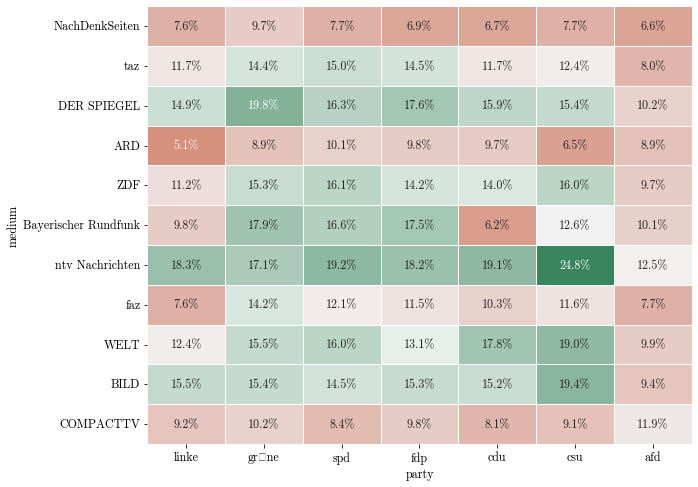

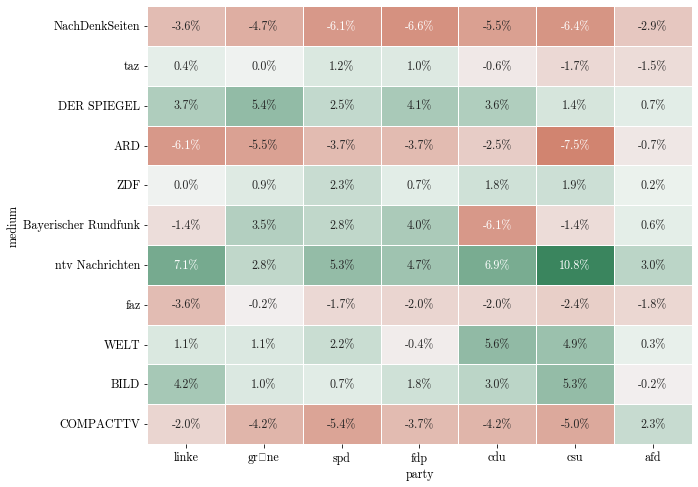

In [70]:
party_positive_classifications_standardized, party_positive_classifications_deviations = sentiment_analysis_pipeline(party_positive_classifications, party_mentions)

/var/folders/k5/jm1h82sn2vd8d4f_0f1091r00000gn/T/ipykernel_39974/548886920.py:47: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  f, ax = plt.subplots(figsize=(9, 8))
/var/folders/k5/jm1h82sn2vd8d4f_0f1091r00000gn/T/ipykernel_39974/548886920.py:47: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  f, ax = plt.subplots(figsize=(9, 8))
/Users/hs/miniforge3/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from current font.
  fig.canvas.draw()


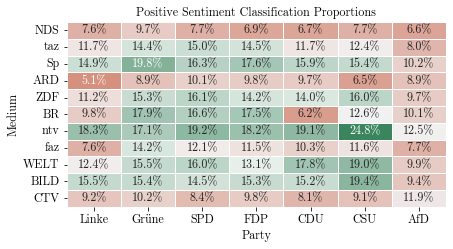

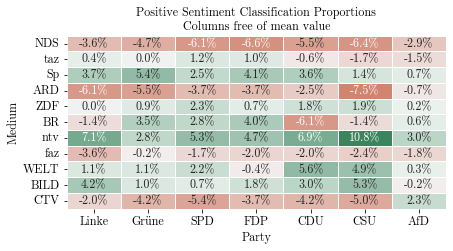

In [71]:
f_saveplot_sentiment_short(df=party_positive_classifications_standardized, title='Positive Sentiment Classification Proportions', path='../results/englisch/sentiment_positiv_gekuerzt.pdf')
f_saveplot_sentiment_short(df=party_positive_classifications_deviations, title='Positive Sentiment Classification Proportions\nColumns free of mean value', path='../results/englisch/sentiment_positiv_gekuerzt_mittelwertfrei.pdf', n_rows_in_title=2)



Pivoted DF:
party                 afd   cdu   csu   fdp  grüne  linke   spd
medium                                                         
ARD                    77   142    54   150     87     17   176
BILD                  477  2411   807  1250    578    199  1778
Bayerischer Rundfunk   31    32   139    34     44     27    79
COMPACTTV             643   279   100   241    147    104   246
DER SPIEGEL           339   535   291   353    224     86   659
NachDenkSeiten        226   392   146   153     83    196   692
WELT                  669  3819  1487  2638   1269    464  3137
ZDF                   876  1889   624  1313    633    411  1673
faz                   277   656   179   342    162     98   583
ntv Nachrichten       335   830   411   443    268    166   706
taz                   139   251    46   125    165    120   214


Sorted DF:
party                 linke  grüne   spd   fdp   cdu   csu  afd
medium                                                         
NachDenkSeite

/var/folders/k5/jm1h82sn2vd8d4f_0f1091r00000gn/T/ipykernel_39974/548886920.py:22: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  f, ax = plt.subplots(figsize=(9, 8))
/Users/hs/miniforge3/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from current font.
  fig.canvas.draw()
/Users/hs/miniforge3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


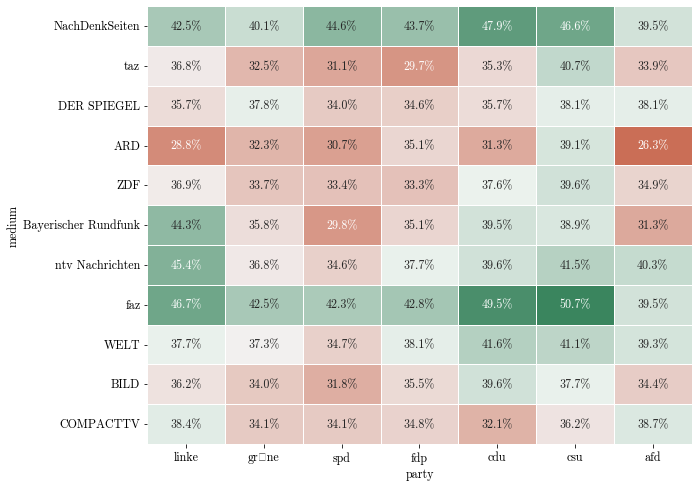

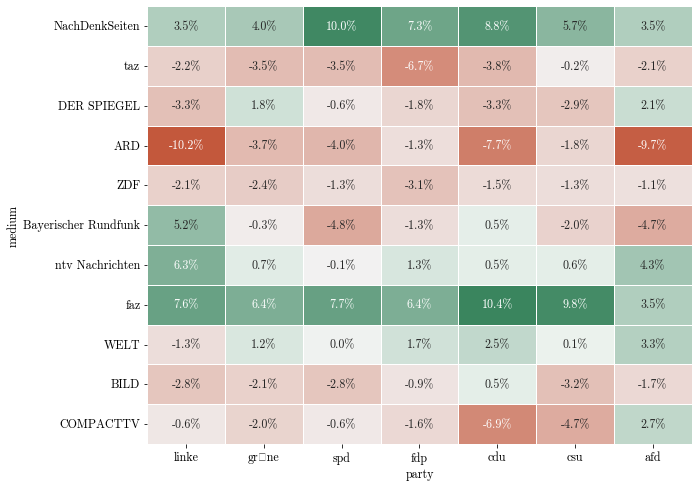

In [72]:
party_neutral_classifications_standardized, party_neutral_classifications_deviations = sentiment_analysis_pipeline(party_neutral_classifications, party_mentions)

/var/folders/k5/jm1h82sn2vd8d4f_0f1091r00000gn/T/ipykernel_39974/548886920.py:47: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  f, ax = plt.subplots(figsize=(9, 8))
/var/folders/k5/jm1h82sn2vd8d4f_0f1091r00000gn/T/ipykernel_39974/548886920.py:47: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  f, ax = plt.subplots(figsize=(9, 8))
/Users/hs/miniforge3/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from current font.
  fig.canvas.draw()


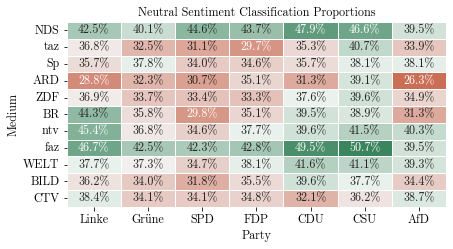

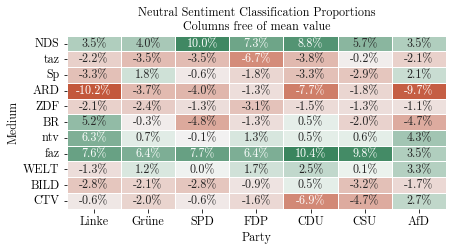

In [73]:
f_saveplot_sentiment_short(df=party_neutral_classifications_standardized, title='Neutral Sentiment Classification Proportions', path='../results/englisch/sentiment_neutral_gekuerzt.pdf')
f_saveplot_sentiment_short(df=party_neutral_classifications_deviations, title='Neutral Sentiment Classification Proportions\nColumns free of mean value', path='../results/englisch/sentiment_neutral_gekuerzt_mittelwertfrei.pdf', n_rows_in_title=2)



Pivoted DF:
party                  afd   cdu   csu   fdp  grüne  linke   spd
medium                                                          
ARD                    190   267    75   235    158     39   340
BILD                   781  2750   918  1734    862    266  2998
Bayerischer Rundfunk    58    44   173    46     57     28   142
COMPACTTV              822   519   151   384    240    142   415
DER SPIEGEL            460   725   355   488    251    119   961
NachDenkSeiten         308   372   143   173    104    230   740
WELT                   865  3729  1447  3385   1609    614  4466
ZDF                   1390  2435   700  2066    960    578  2536
faz                    370   534   133   365    165     96   627
ntv Nachrichten        392   866   333   518    336    133   944
taz                    238   378    53   235    269    168   371


Sorted DF:
party                 linke  grüne   spd   fdp   cdu   csu   afd
medium                                                         

/var/folders/k5/jm1h82sn2vd8d4f_0f1091r00000gn/T/ipykernel_39974/548886920.py:22: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  f, ax = plt.subplots(figsize=(9, 8))
/Users/hs/miniforge3/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from current font.
  fig.canvas.draw()
/Users/hs/miniforge3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


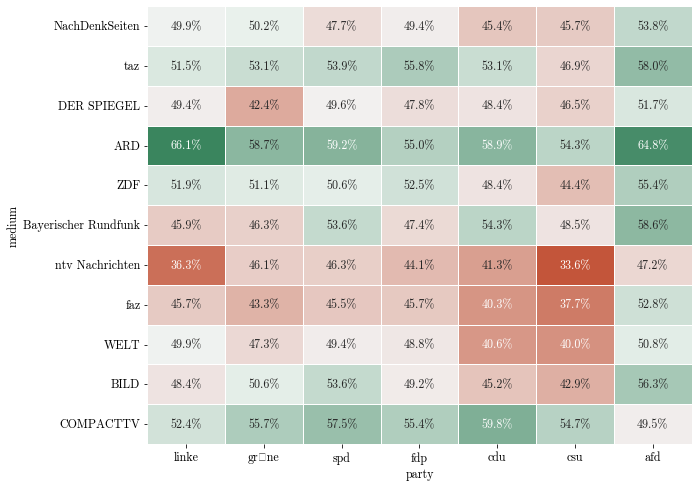

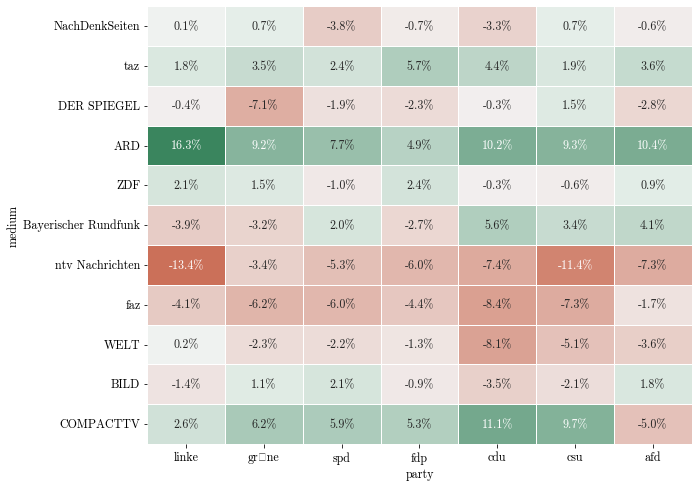

In [74]:
party_negative_classifications_standardized, party_negative_classifications_deviations = sentiment_analysis_pipeline(party_negative_classifications, party_mentions)

/var/folders/k5/jm1h82sn2vd8d4f_0f1091r00000gn/T/ipykernel_39974/548886920.py:47: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  f, ax = plt.subplots(figsize=(9, 8))
/var/folders/k5/jm1h82sn2vd8d4f_0f1091r00000gn/T/ipykernel_39974/548886920.py:47: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  f, ax = plt.subplots(figsize=(9, 8))
/Users/hs/miniforge3/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from current font.
  fig.canvas.draw()


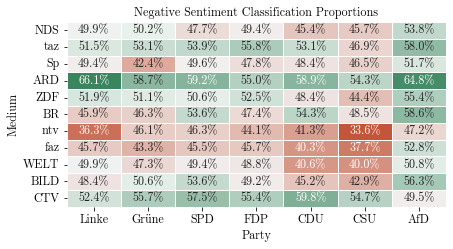

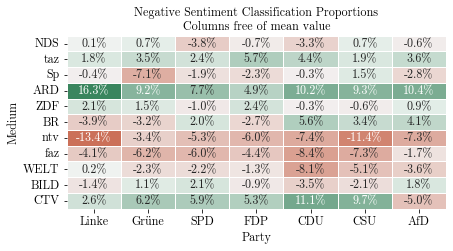

In [75]:
f_saveplot_sentiment_short(df=party_negative_classifications_standardized, title='Negative Sentiment Classification Proportions', path='../results/englisch/sentiment_negativ_gekuerzt.pdf')
f_saveplot_sentiment_short(df=party_negative_classifications_deviations, title='Negative Sentiment Classification Proportions\nColumns free of mean value', path='../results/englisch/sentiment_negativ_gekuerzt_mittelwertfrei.pdf', n_rows_in_title=2)

In [76]:
#plausability test
party_positive_classifications_standardized+party_neutral_classifications_standardized+party_negative_classifications_standardized

party,linke,grüne,spd,fdp,cdu,csu,afd
medium,,,,,,,
NachDenkSeiten,1.0,1.0,1.0,1.0,1.0,1.0,1.0
taz,1.0,1.0,1.0,1.0,1.0,1.0,1.0
DER SPIEGEL,1.0,1.0,1.0,1.0,1.0,1.0,1.0
ARD,1.0,1.0,1.0,1.0,1.0,1.0,1.0
ZDF,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Bayerischer Rundfunk,1.0,1.0,1.0,1.0,1.0,1.0,1.0
ntv Nachrichten,1.0,1.0,1.0,1.0,1.0,1.0,1.0
faz,1.0,1.0,1.0,1.0,1.0,1.0,1.0
WELT,1.0,1.0,1.0,1.0,1.0,1.0,1.0
